# PASCAL VOC 2007数据集

## 简介

PASCAL VOC 2007数据集基于4个大类别，共包含了20个目标类：

Person: person


Animal: bird, cat, cow（奶牛）, dog, horse, sheep（绵羊）

Vehicle（交通工具）: aeroplane（飞机）, bicycle, boat（小船）, bus（公共汽车）, car（轿车）, motorbike（摩托车）, train（火车）

Indoor（室内）: bottle（瓶子）, chair（椅子）, dining 
table（餐桌）, potted plant（盆栽植物）, sofa, tv/monitor（电视/显示器）

## 下载数据集

使用pytorch内置下载函数进行下载：

```
torchvision.datasets.VOCDetection(
    root: str, year: str = '2012', 
    image_set: str = 'train', 
    download: bool = False, 
    transform: Union[Callable, NoneType] = None,    
    target_transform: Union[Callable, NoneType] = None,
    transforms: Union[Callable, NoneType] = None)
```

In [1]:
import torch
import torchvision

In [2]:
dataset=torchvision.datasets.VOCDetection(
    root='../datasets/',year='2007',
    image_set='trainval',
    download=False, 
    # transform=transforms.ToTensor())
)

{'annotation': {'folder': 'VOC2007', 'filename': '000017.jpg', 'source': {'database': 'The VOC2007 Database', 'annotation': 'PASCAL VOC2007', 'image': 'flickr', 'flickrid': '228217974'}, 'owner': {'flickrid': 'genewolf', 'name': 'whiskey kitten'}, 'size': {'width': '480', 'height': '364', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'person', 'pose': 'Left', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '185', 'ymin': '62', 'xmax': '279', 'ymax': '199'}}, {'name': 'horse', 'pose': 'Left', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '90', 'ymin': '78', 'xmax': '403', 'ymax': '336'}}]}}
(364, 480, 3)


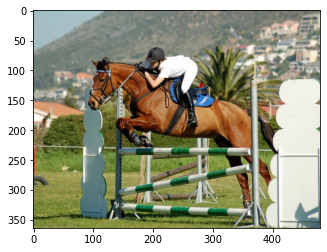

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img,target=dataset.__getitem__(5)
img=np.array(img)

print(target)
print(img.shape)

# image = cv2.imread(img_path,cv2.IMREAD_COLOR)
# tmp=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# cv2.imwrite('img.jpg',img)

plt.imshow(img)

## 类别

从标注文件中，提取出20个类别。

In [6]:
import os
import xmltodict

def statics_cates(annotation_dir):
    anno_list=os.listdir(annotation_dir)

    cate_list=list()
    for name in anno_list:
        anno_path=os.path.join(annotation_dir,name)
        with open(anno_path,'rb') as f:
            xml_dict=xmltodict.parse(f)

            objects=xml_dict['annotation']['object']
            # 多个目标
            if isinstance(objects,list):
                for obj in objects:
                    name=obj['name']
                    if name not in cate_list:
                        cate_list.append(name)
            # 单个目标
            elif isinstance(objects,dict):
                name=objects['name']
                if name not in cate_list:
                    cate_list.append(name)
            # 无目标
            else:
                pass
    # 返回名称列表，按字母排序
    return sorted(cate_list)

In [10]:
annotation_dir='../datasets/VOCdevkit/VOC2007/Annotations'

# statics_cates(annotation_dir)

['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [4]:
cates=['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

## 数据

整个数据集总共9963幅图像，包含24640个标注对象。

+ 训练数据：2501张图像，共6301个目标

+ 验证数据：2510张图像，共6307个目标

+ 训练+验证数据：5011张图像，共12608个目标

定义函数，显示示例图片及其目标的边界框

In [6]:
def show_bbox(img,target):
    img=np.array(img)
    # 显示原图
    # 使用cv2 显示img
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    # 使用plt显示img
    # plt.imshow(img)

    # 画出目标的边界框
    objects=target['annotation']['object']
    # 图片中，有多个目标
    if isinstance(objects,list):
        for obj in objects:
            bbox=obj['bndbox']
            xmin,ymin,xmax,ymax=int(bbox['xmin']),int(bbox['ymin']),int(bbox['xmax']),int(bbox['ymax'])
            cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,255,0),1)
            cv2.putText(img, obj['name'], (xmin,ymin),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))
    # 图片中，一个目标
    elif isinstance(objects,dict):
        bbox=objects['bndbox']
        xmin,ymin,xmax,ymax=int(bbox['xmin']),int(bbox['ymin']),int(bbox['xmax']),int(bbox['ymax'])
        cv2.rectangle(img,(xmin,ymin),(xmax,ymax),(0,255,0),1)
        cv2.putText(img, obj['name'], (xmin,ymin),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))
    # 图片中，无目标
    else:
        pass
    # 显示画有边界框的图片
    img_name=target['annotation']['filename']
    plt.title(img_name)
    plt.imshow(img)
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    # cv2.imshow(img_name, img)
    # cv2.waitKey(0)
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

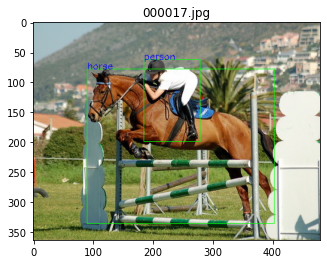

In [12]:
# def show_bbox(dataset):
img,target=dataset.__getitem__(5)
show_bbox(img,target)

## 数据集

从VOC数据集，加载部分数据，作为数据集。

In [16]:
cate1_txt_path='../datasets/VOCdevkit/VOC2007/ImageSets/Main/cat_val.txt'

f=open(cate1_txt_path)
dataList=[]
cnt=0
for file in f.readlines():
    path='../datasets/VOCdevkit/VOC2007/JPEGImages'
    img_path=path + '/' + file.split(' ')[0] + '.jpg' 
    dataList.append(img_path)
    cnt+=1
    if cnt ==50:
        break
dataList[:5]

['../datasets/VOCdevkit/VOC2007/JPEGImages/000005.jpg',
 '../datasets/VOCdevkit/VOC2007/JPEGImages/000007.jpg',
 '../datasets/VOCdevkit/VOC2007/JPEGImages/000009.jpg',
 '../datasets/VOCdevkit/VOC2007/JPEGImages/000016.jpg',
 '../datasets/VOCdevkit/VOC2007/JPEGImages/000019.jpg']

In [17]:
cate2_txt_path='../datasets/VOCdevkit/VOC2007/ImageSets/Main/dog_val.txt'


f=open(cate1_txt_path)
cnt=0
for file in f.readlines():
    path='../datasets/VOCdevkit/VOC2007/JPEGImages'
    img_path=path + '/' + file.split(' ')[0] + '.jpg' 
    dataList.append(img_path)
    cnt+=1
    if cnt == 50:
        break

In [18]:
dataList[-2:]

['../datasets/VOCdevkit/VOC2007/JPEGImages/000180.jpg',
 '../datasets/VOCdevkit/VOC2007/JPEGImages/000184.jpg']

In [20]:
# 训练集：验证集 = 4：1
trainArrList=[]
testArrList=[]
for i,file in enumerate(dataList):
    if i //10 == 4 or i //10 == 9 :
        testArrList.append(file)
    else:
        trainArrList.append(file)
print(len(trainArrList))
print(len(testArrList))

80
20


In [21]:
# 保存到train.txt文件
with open('./train.txt','w') as f:
    for i in trainArrList:
        f.write(i + '\n')
f.close()

In [22]:
# 保存到val.txt文件
with open('./val.txt','w') as f:
    for i in testArrList:
        f.write(i + '\n')
f.close()

In [ ]:
# 加载xml文件

In [ ]:
xml_path='../datasets/VOCdevkit/VOC2007/Annotations/
